In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv(r"C:\Users\Herald\Documents\ML_Zoomcamp\03_classification\Telco-Customer-Churn.csv")

# Clean columns names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Clean Categorical values
categorical_cols = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [5]:
# Check for other columns that should be  transformed or interpreted to be either numerical or categorical
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
# column seniorcitizen is a number but is considered as categorical since its like a binary representation of a yes or no
# totalcharges is currently an object type and should be a float type
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce').fillna(0)

In [7]:
# Convert this to int 0 and 1
df.churn = (df.churn == 'yes').astype(int)
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

In [8]:
# Setting up Validation Framework

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [9]:
# Group numerical categories
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [col for col in df_full_train.columns if col not in numerical and col != 'churn' and col != 'customerid']

In [10]:
# Training the model 
dv = DictVectorizer(sparse=False)

test_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(test_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_val_pred = model.predict_proba(X_val)[:, 1]
churn_decision = y_val_pred >= 0.5
(y_val == churn_decision).astype(int).mean()

0.8034066713981547

# 4.2 Accuracy and Dummy Model
* Evaluate the model on different thresholds
* Check the Accuracy of dummy baselines

In [12]:
threshold = np.linspace(0, 1, 21)
scores = []

In [13]:
threshold

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [14]:
for t in threshold:
    churn_decision = y_val_pred >= t
    score = (y_val == churn_decision).astype(int).mean()
    
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


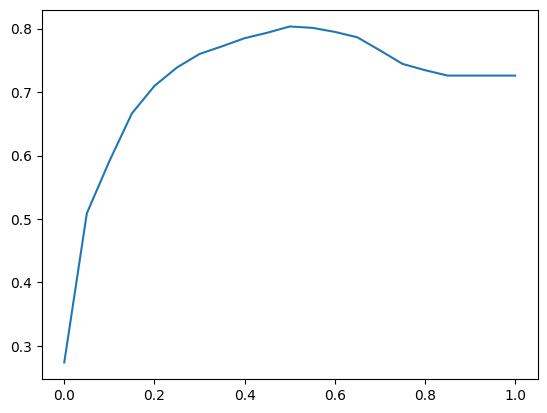

In [15]:
#plot the scores per threshold
plt.plot(threshold, scores)

In [16]:
# Another way to implement the evauluation for accuracy with different threshold is using sklearn.metrics. accuracy_score()

from sklearn.metrics import accuracy_score

for t in threshold:
    
    score = accuracy_score(y_val, y_val_pred >= t)
    
    print('%.2f %.3f' %(t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [17]:
# For imbalance datasets, accuracy is not a good evaluation metrics. 
# For example if we look the result of our dummy model where t >= 1, we got an accuracy_score of almost 73%, meaning our dataset has more values where a customer is not to churn than to churn (an example of an imbalanced dataset).
# If we proceed with this model, it will highly predict at most instace that a customer will not churn and our model will not perform well

In [18]:
from collections import Counter

Counter(y_val_pred >= 1.0)

Counter({False: 1409})

In [19]:
1- y_val.mean()

0.7260468417317246

# 4.3 Confusion Table
* Different types of erros and correct decisions
* Arranging them in table

In [20]:
# We can group our actuals and predictions so that we can define our True Positives, True Negatives, False Positives and False Negatives

In [21]:
actual_positive = y_val == 1
actual_negative = y_val == 0

In [22]:
t = 0.5
pred_positive = y_val_pred >= t
pred_negative = y_val_pred < t

In [23]:
# Count our True Positives, True Negatives, False Positives and False Negatives
tn = (actual_negative & pred_negative).sum()
fp = (actual_negative & pred_positive).sum()

In [24]:
tn, fp

(922, 101)

In [25]:
fn = (actual_positive & pred_negative).sum()
tp = (actual_positive & pred_positive).sum()

In [26]:
fn, tp

(176, 210)

In [27]:
confusion_matrix = np.array([[tn, fp],
                            [fn, tp]])

In [28]:
confusion_matrix

array([[922, 101],
       [176, 210]])

# 4.4 Precision and Recall

In [29]:
# Accuracy looks like this in terms of tp, fp , tn, fn
accuracy = (tp + tn)/ (tp + fp + tn + fn)
accuracy

0.8034066713981547

In [30]:
# Precision is the fraction of positive prediction that are correct
precision = tp / (tp + fp)
precision

0.6752411575562701

In [31]:
# This means around 33% we mistakenly identifued to churn and sent discount emails , what a waste!

In [32]:
# Recall is the framction of correctly identified from positive examples
recall = tp / (tp + fn)
recall

0.5440414507772021

In [33]:
# This means that 46% we failed to identified.
# The metrics above shows that accuracy can be misleading 

# 4.5 ROC Curves
* ROC means receiver operating characteristic

## TPR (true postive rate) and FPR (false positive rate)

In [34]:
tpr = tp / (fn + tp) # the same with recall
tpr

0.5440414507772021

In [35]:
fpr = fp / (tn + fp)
fpr

0.09872922776148582

In [36]:
# What we want to do is evaluate these values for all possible threshold

In [37]:
scores = []
thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = y_val == 1
    actual_negative = y_val == 0
    
    pred_positive = y_val_pred >= t
    pred_negative = y_val_pred < t
    
    tn = (actual_negative & pred_negative).sum()
    fp = (actual_negative & pred_positive).sum()
    fn = (actual_positive & pred_negative).sum()
    tp = (actual_positive & pred_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [38]:
df_scores = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])

In [39]:
df_scores['tpr'] =  df_scores['tp'] / (df_scores['fn'] + df_scores['tp'])
df_scores['fpr'] =  df_scores['fp'] / (df_scores['tn'] + df_scores['fp'])           

In [40]:
df_scores[:: 10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,366,556,20,467,0.948187,0.543500
20,0.2,333,356,53,667,0.862694,0.347996
30,0.3,284,236,102,787,0.735751,0.230694
40,0.4,249,166,137,857,0.645078,0.162268
50,0.5,210,101,176,922,0.544041,0.098729
60,0.6,150,53,236,970,0.388601,0.051808
70,0.7,76,20,310,1003,0.196891,0.019550
80,0.8,13,1,373,1022,0.033679,0.000978
90,0.9,0,0,386,1023,0.000000,0.000000


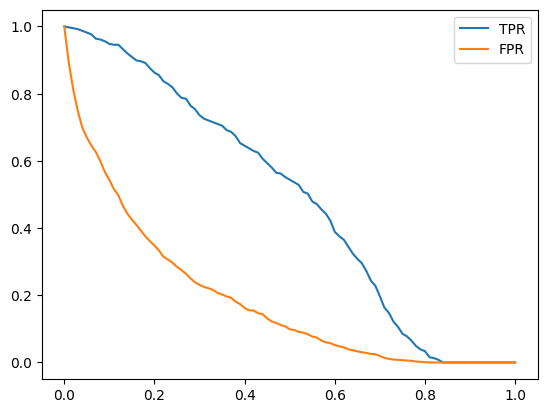

In [41]:
# Plot
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

## Random Model

## Ideal Model

## Plotting Thru Scikit Learn

In [42]:
from sklearn.metrics import roc_curve

# 4.6 ROC AUC
* Area Under the Curve - useful metric
* Interpretation of AUC

In [43]:
from sklearn.metrics import auc

In [44]:
auc(df_scores.fpr, df_scores.tpr)

0.8438732975754537

In [45]:
from sklearn.metrics import roc_auc_score

In [46]:
roc_auc_score(y_val, y_val_pred)

0.843850505725819

In [47]:
neg = y_val_pred[y_val == 0]
pos = y_val_pred[y_val == 1]

# 4.7 Cross Validation (parameter tuning)
* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [69]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    #model = LogisticRegression()\
    # parameter tuning we declare our model like this
    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train)

In [60]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [52]:
from sklearn.model_selection import KFold

In [53]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [57]:
train_idx, val_idx = next(kfold.split(df_full_train)) #returns indexes of the splits

In [58]:
len(train_idx), len(val_idx)

(5070, 564)

In [59]:
df_train = df_full_train.iloc[train_idx]
df_val = df_full_train.iloc[val_idx]

In [61]:
!pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 682.7 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 434.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.3 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 1.5 MB/s eta 0:00:00


In [ ]:
# tqdm is a library you can use to see progress on your loop 

In [62]:
from tqdm.auto import tqdm

In [70]:
# Lets loop on our kfold splits

scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

5it [00:01,  3.36it/s]


In [64]:
scores

[0.8479398247539081,
 0.8410272277227722,
 0.8557214756739697,
 0.8339313636737719,
 0.826395781637717,
 0.8342657342657342,
 0.8412569195701727,
 0.8186669829222013,
 0.8454868830591374,
 0.8618029646062317]

In [65]:
np.mean(scores), np.std(scores)

(0.8406495157885615, 0.012344956974737344)

In [71]:
# Lets use different values of C (regularization)
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    
    scores = []
    
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc) 
        
    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

 14%|█▍        | 1/7 [00:01<00:09,  1.52s/it]

C=0.001 0.840 +- 0.008


 29%|██▊       | 2/7 [00:02<00:07,  1.48s/it]

C=0.01 0.840 +- 0.008


 43%|████▎     | 3/7 [00:04<00:05,  1.48s/it]

C=0.1 0.840 +- 0.008


 57%|█████▋    | 4/7 [00:05<00:04,  1.48s/it]

C=0.5 0.840 +- 0.008


 71%|███████▏  | 5/7 [00:07<00:02,  1.49s/it]

C=1 0.840 +- 0.008


 86%|████████▌ | 6/7 [00:08<00:01,  1.49s/it]

C=5 0.840 +- 0.008


100%|██████████| 7/7 [00:10<00:00,  1.48s/it]

C=10 0.840 +- 0.008


In [72]:
# Train FINAL MODEL using C=1.0

dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259